In [41]:
#import required libraries
import matplotlib.pyplot as plt   #for creating plots and visualization
import seaborn as sns      #for data visualization
import scipy       #scientific computing library
import re      # Regular expression operations
import missingno as mso   # Missing data visualization
from scipy import stats   # Statistical functions
from scipy.stats import ttest_ind    # Statistical tests
from scipy.stats import pearsonr     # Statistical tests
from sklearn.preprocessing import StandardScaler,LabelEncoder # Data preprocessing
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.neighbors import KNeighborsClassifier    # K-Nearest Neighbors classifier
from sklearn.svm import SVC      # Support Vector Machine classifier
from sklearn.ensemble import GradientBoostingClassifier     # Gradient Boosting classifier
from xgboost import XGBClassifier        # Extreme Gradient Boosting classifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report      # Evaluation metrics
import numpy as np       # Numerical operations
import pandas as pd       # Data manipulation

In [42]:
# Reading the dataset from a CSV file named "seattle-weather.csv"
data=pd.read_csv("seattle-weather.csv") 

# Displaying the first few rows of the dataset to understand its structure and contents
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [43]:
# Getting the dimensions of the dataset
data.shape

(1461, 6)

<Axes: xlabel='weather', ylabel='count'>

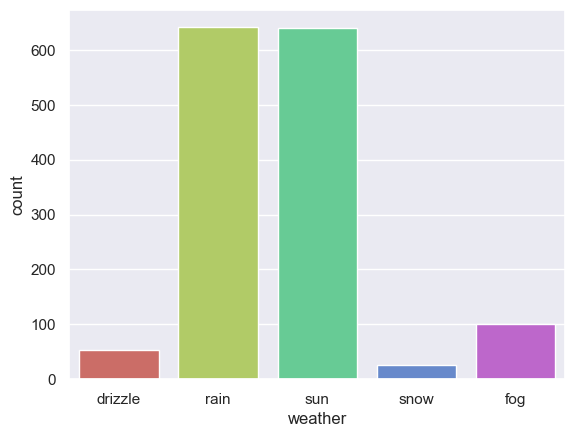

In [38]:
# Suppressing warnings to improve readability and Creating a count plot of the 'weather' variable using seaborn
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather",data=data,palette="hls")

In [44]:
# Counting occurrences of different weather conditions
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
# Calculating and printing the percentage of occurrences for each weather condition
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


In [40]:
# Descriptive statistics for selected weather variables
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


##### Setting the seaborn style to "darkgrid"
sns.set(style="darkgrid")
# Creating a figure with subplots
fig,axs=plt.subplots(2,2,figsize=(10,8))
# Creating histogram plots for precipitation, temp_max, temp_min, and wind variables
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

<Axes: xlabel='wind'>

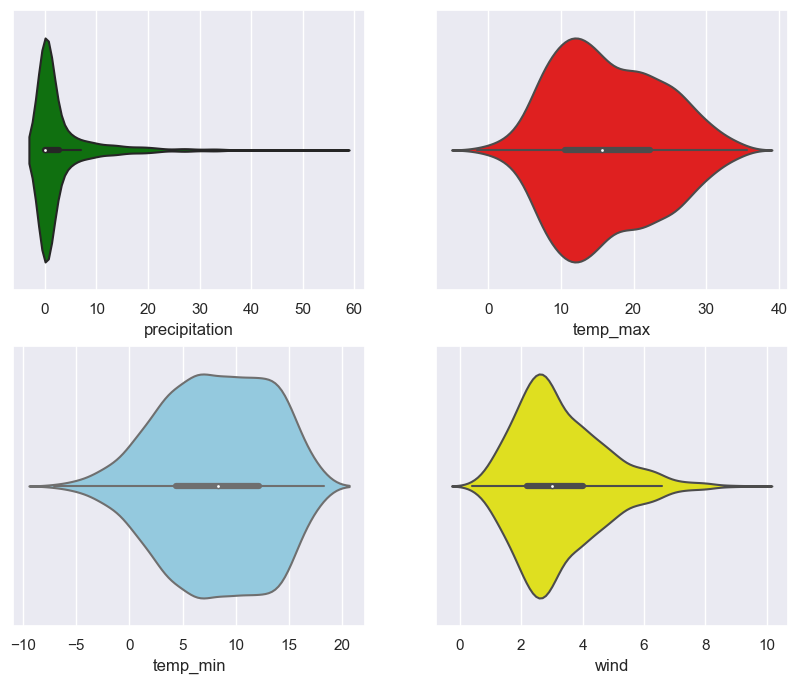

In [8]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
# Creating violin plots for precipitation, temp_max, temp_min, and wind variables
sns.violinplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind",kde=True,ax=axs[1,1],color='yellow')

<Axes: xlabel='precipitation', ylabel='weather'>

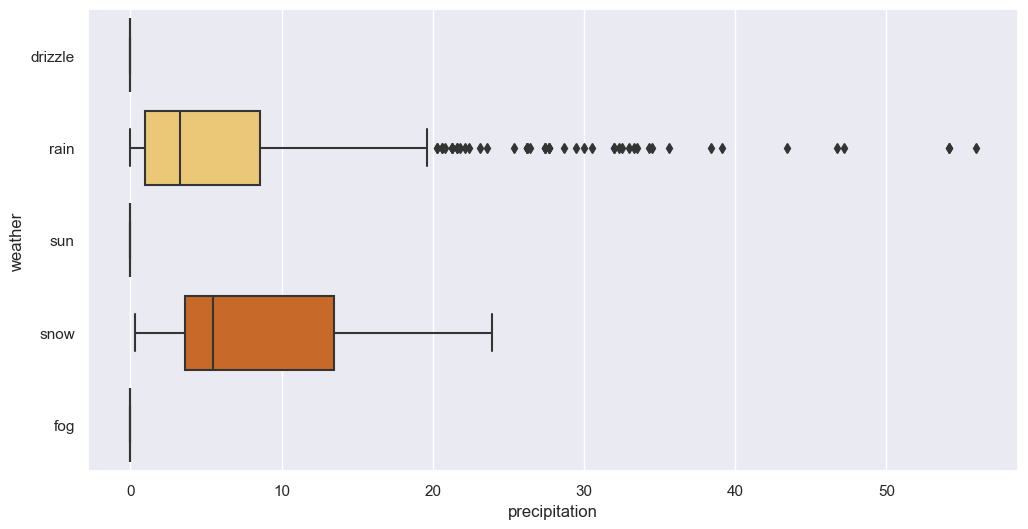

In [9]:
plt.figure(figsize=(12,6))
# Creating a boxplot of precipitation vs weather
sns.boxplot(x="precipitation",y="weather",data=data,palette="YlOrBr")

<Axes: xlabel='temp_max', ylabel='weather'>

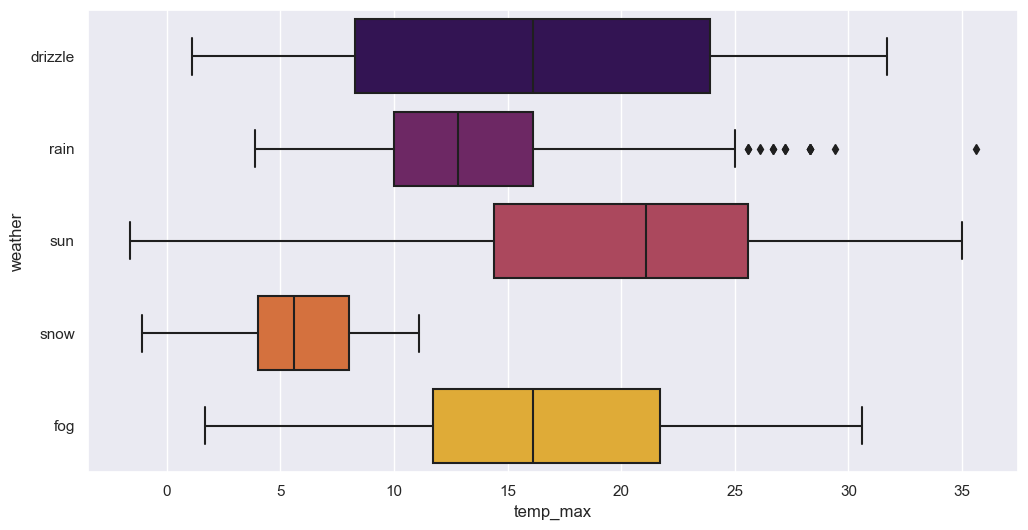

In [10]:
plt.figure(figsize=(12,6)) 
# Creating a boxplot of temp_max vs weather
sns.boxplot(x="temp_max",y="weather",data=data,palette="inferno") 

<Axes: xlabel='temp_min', ylabel='weather'>

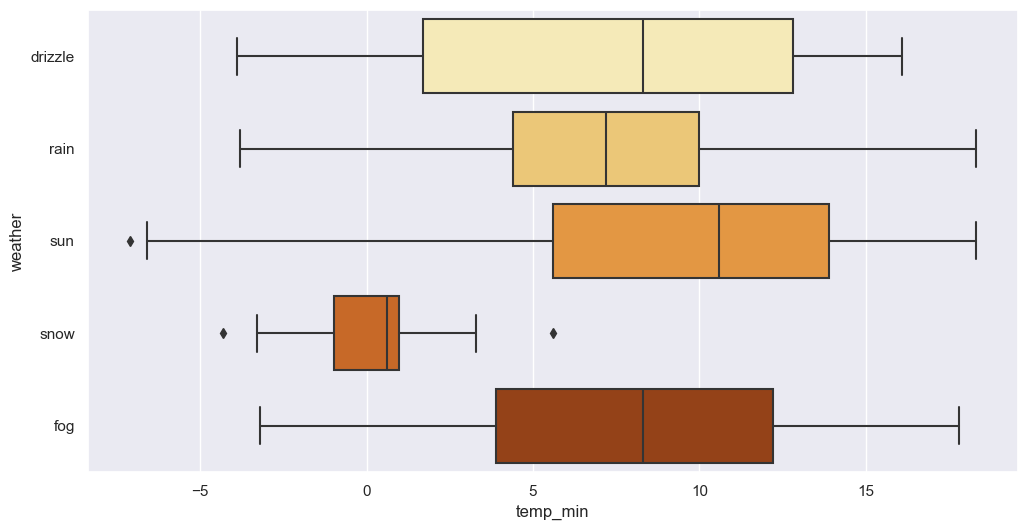

In [11]:
plt.figure(figsize=(12,6))
# Creating a boxplot of temp_min vs weather
sns.boxplot(x="temp_min",y="weather",data=data,palette="YlOrBr")

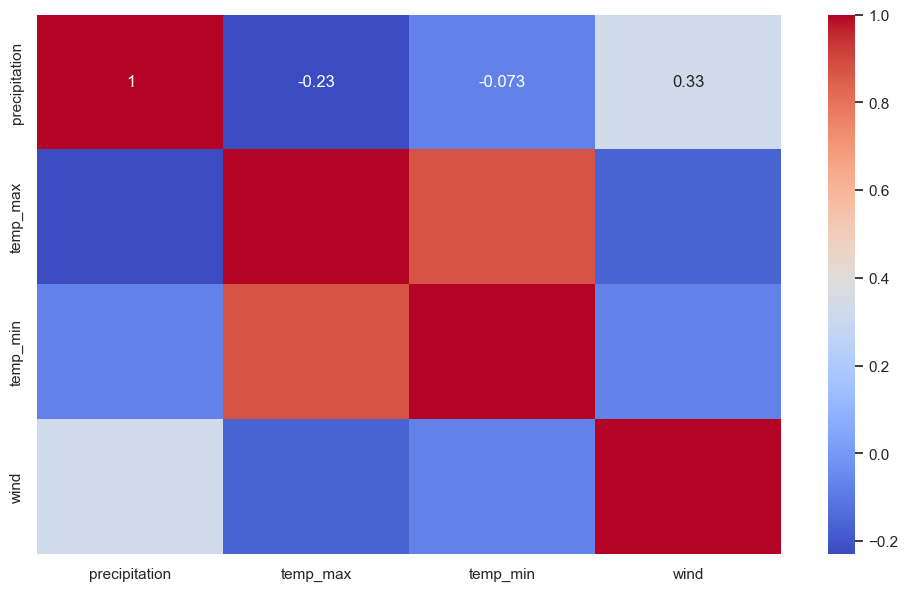

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert non-numeric columns to numeric if possible
data_numeric = data.apply(pd.to_numeric, errors='ignore')

# Selecting only numeric columns
data_numeric = data_numeric.select_dtypes(include=['number'])

# Creating a heatmap to visualize correlation between numeric variables
plt.figure(figsize=(12, 7))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()


Pearson correlation: -0.22855481643297046
T Test and P value: TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


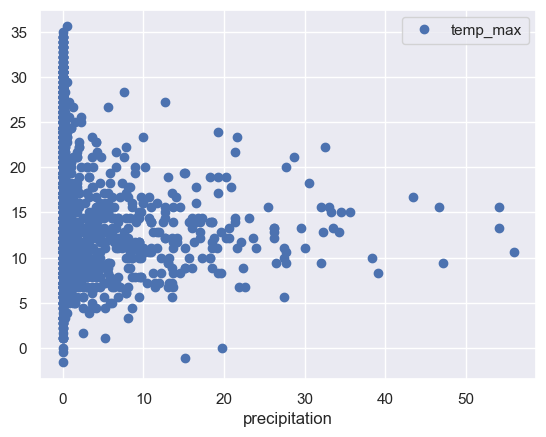

In [13]:
# Plotting a scatter plot between 'precipitation' and 'temp_max'
data.plot("precipitation","temp_max",style='o') 
# Calculating Pearson correlation coefficient between 'precipitation' and 'temp_max'
print("Pearson correlation:",data["precipitation"].corr(data["temp_max"]))
# Performing a two-sample T-test between 'precipitation' and 'temp_max'
print("T Test and P value:",stats.ttest_ind(data["precipitation"],data["temp_max"]))


Pearson correlation: -0.16485663487495486
T Test and P value: TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


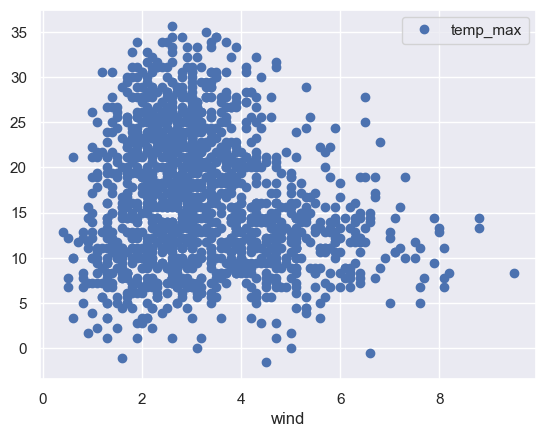

In [14]:
# Plotting a scatter plot between 'wind' and 'temp_max'
data.plot("wind","temp_max",style='o') 
# Calculating Pearson correlation coefficient between 'wind' and 'temp_max'
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))
# Performing a two-sample T-test between 'wind' and 'temp_max'
print("T Test and P value:",stats.ttest_ind(data["wind"],data["temp_max"]))

<Axes: xlabel='temp_max'>

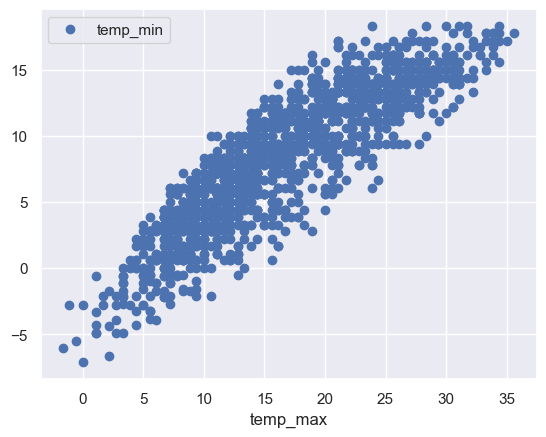

In [15]:
# Plotting a scatter plot between 'temp_max' and 'temp_min' 
data.plot("temp_max","temp_min",style='o') 

In [16]:
# Checking for missing values in the dataset and Printing the number of missing values for each column
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

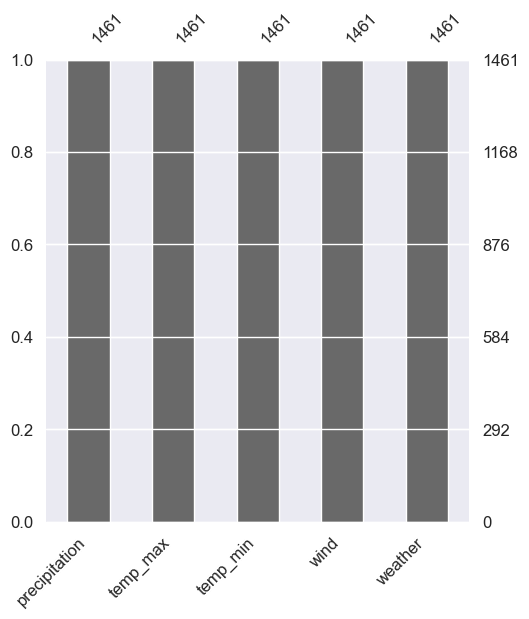

In [17]:
plt.figure(figsize=(12,6))
# Creating a subplot with 1 row and 2 columns, and selecting the second subplot
axz=plt.subplot(1,2,2)
# Plotting missingness matrix using missingno's bar plot
mso.bar(data.drop(["date"],axis=1),ax=axz,fontsize=12);

In [18]:
# Creating a new DataFrame by dropping the "date" column from the original DataFrame
df=data.drop(["date"],axis=1)

In [19]:
import pandas as pd
# Converting non-numeric columns to numeric, coercing errors to NaN
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

# Determining the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering outliers using IQR method
data_filtered = data_numeric[~((data_numeric < lower_bound) | (data_numeric > upper_bound)).any(axis=1)]


In [20]:
# Applying square root transformation to 'precipitation' and 'wind' columns in DataFrame df
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<Axes: xlabel='wind', ylabel='Count'>

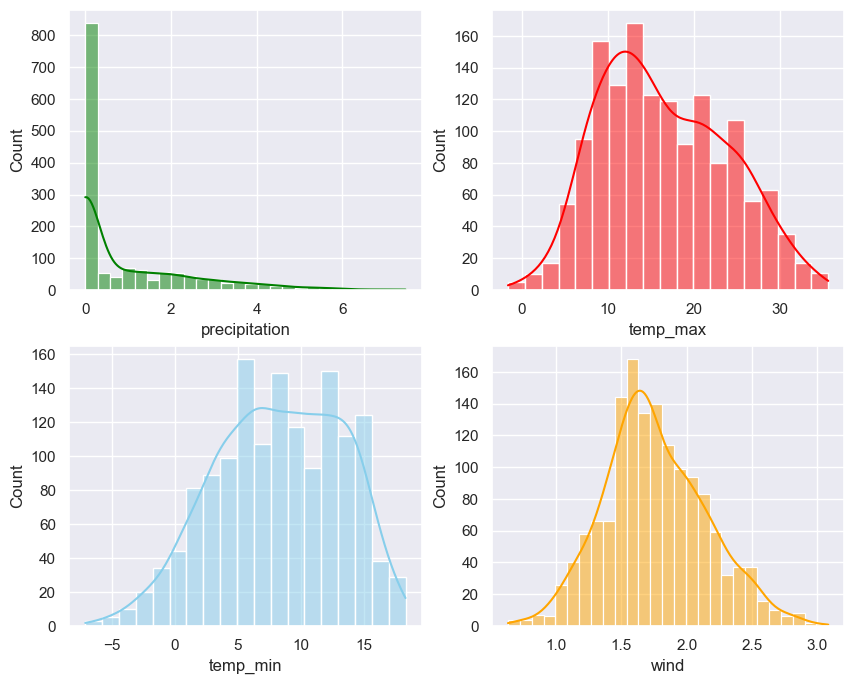

In [21]:
sns.set(style="darkgrid")
# Creating a figure with 2 rows and 2 columns of subplots
fig,axs=plt.subplots(2,2,figsize=(10,8))

# Plotting histograms with kernel density estimates for 'precipitation', 'temp_max', 'temp_min', and 'wind'
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [22]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
1,3.301515,10.6,2.8,2.121320,rain
2,0.894427,11.7,7.2,1.516575,rain
3,4.505552,12.2,5.6,2.167948,rain
4,1.140175,8.9,2.8,2.469818,rain


In [23]:
# Instantiating a LabelEncoder object
lc=LabelEncoder()
# Encoding the 'weather' column in DataFrame df
df["weather"]=lc.fit_transform(df["weather"])

In [24]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
1,3.301515,10.6,2.8,2.121320,2
2,0.894427,11.7,7.2,1.516575,2
3,4.505552,12.2,5.6,2.167948,2
4,1.140175,8.9,2.8,2.469818,2


In [25]:
# Extracting feature variables (x) and target variable (y) from DataFrame df
# x contains all columns except "weather", converted to integer values
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
# y contains the "weather" column values
y=df["weather"].values

In [26]:
# Printing the unique values of the 'weather' column in DataFrame df
df.weather.unique()

array([0, 2, 4, 3, 1])

In [27]:
# Splitting the data into training and testing sets
# x_train: features for training, x_test: features for testing, y_train: target for training, y_test: target for testing
# The test_size parameter specifies the proportion of the dataset to include in the test split (here 10%)
# The random_state parameter ensures reproducibility of the split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [28]:
# Instantiating the KNeighborsClassifier model
knn=KNeighborsClassifier()
# Fitting the model to the training data
knn.fit(x_train,y_train)
# Evaluating the model accuracy on the testing data
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:74.15%


In [29]:
# Instantiating the Support Vector Machine (SVM) classifier
svm=SVC()
# Fitting the SVM model to the training data
svm.fit(x_train,y_train)
# Fitting the SVM model to the training data
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:79.59%


In [30]:
# Instantiating the Gradient Boosting Classifier with specified hyperparameters
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
# Fitting the model to the training data
gbc.fit(x_train,y_train)
# Evaluating the model accuracy on the testing data
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:78.91%


In [31]:
import warnings
warnings.filterwarnings('ignore')
# Instantiating the Extreme Gradient Boosting (XGBoost) Classifier
xgb=XGBClassifier()
# Fitting the model to the training data
xgb.fit(x_train,y_train)
# Evaluating the model accuracy on the testing data
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:80.27%


In [32]:
# Providing input data for weather prediction
input=[[1.140175,8.9,2.8,2.469818]]
# Predicting the weather using the trained XGBoost model
ot=xgb.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain


### 